<h2 style = "padding: 10px; background-color:#5D3FD3; color:#e4df98 ; font-size:190%; font-family:arial; text-align:center; border-style:solid; border-radius:0px 20px">  Predicting Flower Species <h2>
    

<img src = "https://miro.medium.com/v2/resize:fit:1200/1*7bnLKsChXq94QjtAiRn40w.png" />

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:150%; font-family:arial; text-align:center;  border-radius:20px 20px"> About Dataset </h3>   

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
<ul>
<li>Id</li>
<li>SepalLengthCm</li>
<li>SepalWidthCm</li>
<li>PetalLengthCm</li>
<li>PetalWidthCm</li>
<li>Species</li>
</ul>

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:150%; font-family:arial; text-align:center;  border-radius:20px 20px"> objective </h3>   

<b>IRIS</b> dataset covers three classes of flowers: Versicolor, Setosa, and Virginica, with four features each: 'sepal length', 'sepal width,' 'petal length,' and 'petal width.' This IRIS dataset project aims to predict flowers based on their unique characteristics. We will build a <b>Machine Learning Model</b> to classify the flower classes within the IRIS dataset.

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:150%; font-family:arial; text-align:center;  border-radius:20px 20px"> Importing Packages </h3>   

In [1]:
# Data wrangling
import pandas as pd
# Computational operations
import numpy as np  

# For ploting graph / Visualization
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

import ipywidgets as widgets
from IPython.display import display

# To show graph below the code
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from rich import print
import warnings
warnings.simplefilter("ignore")

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:150%; font-family:arial; text-align:center;  border-radius:20px 20px"> Loading & Basic Exploration </h3> 

In [2]:
# Loading dataset
iris = pd.read_csv('D:\Internship\Coding Samurai\Iris.csv')
iris_copy = iris.copy()

In [3]:
# Data shape
print(f'The Dataset contains {iris.shape[0]} Rows and {iris.shape[1]} Columns')

The Dataset contains 150 Rows and 6 Columns

In [4]:
# Customs styles and properties for table
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: darkgrey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #5D3FD3; color: white; text-align: center"
}
properties = {"border": "1px solid black", "width": "160px", "text-align": "center"}

In [5]:
# First 5 rows of data
iris.head().style.format(precision=1).set_table_styles([cell_hover, index_names, headers]).set_properties(**properties)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Checking columns data types, not-nulls, and size
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Checking if there is some duplicates values in our data 
iris.duplicated().sum()

0

In [8]:
# Checking if there is any nulll values in columns
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# Displaying statistical summary of data
iris.describe().T.style.set_table_styles([cell_hover, index_names, headers]).set_properties(**properties)

,count,mean,std,min,25%,50%,75%,max
Id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000
SepalLengthCm,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


<div class="alert alert-block alert-info">
<b><u>Insights from Basic Exploration Section:</u></b>

* The Iris dataset comprises<b>150</b> row and <b>6</b> columns.
* The columns are named as follows: <b>Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and Species</b>. Among these columns, Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm are considered as input features, while the Species column serves as the label or output column.
* The Species column is categorical, indicating that this is a classification problem. We will employ <b>Supervised classification algorithms</b> to construct the model.
* All columns are of their <b>appropriate data types</b>.
* There are no or <b>0</b> duplicates values in dataset.
* There is no <b>missing(null-values)</b> values in the dataset.
* The dataset appears to be <b>clean</b> and free from data inconsistencies or anomalies.
* Distributions for <b>PetalLengthCm</b> and <b>PetalWidthCm</b> exhibit <b>negative skewness</b>, as evidenced by their medians being slightly higher than their means.
* Distributions for <b>SepalLengthCm</b> and <b>SepalWidthCm</b> display <b>positive skewness</b>, as indicated by their medians being slightly lower than their means.    

</div>

<br>

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:150%; font-family:arial; text-align:center;  border-radius:20px 20px"> Exploratory Data Analysis (EDA) </h3> 

<center> <span style="font-family:calibri"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#e4df98;font-size:200%;font-weight: 500%;color:#5D3FD3;overflow:hidden;">ㅤUnivariate Analysisㅤ</span>

In [10]:
# Colors 
color_palette = [
    '#1f77b4',  # Blue
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#ff7f0e',  # Orange
    '#8c564b',  # Brown
]

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Species Distribution :--&nbsp;</span>
</div>


In [11]:

data = go.Bar(x = iris['Species'].value_counts().index, 
              y = iris['Species'].value_counts().values, 
              orientation='v',
              textposition = 'inside',
              text = iris['Species'].value_counts().values,
              textfont = dict(size = 22,
                              color = 'white'),
              marker = dict(color = color_palette,
                           opacity = 0.7,
                           line_color = 'black',
                           line_width = 3))

layout = go.Layout(title = {'text' : '<b><i>-- Species Distribution --</i></b>',
                            'x' : 0.5
                           },
                   xaxis = {'title': '<b>Species</b>'},
                   yaxis = {'title': '<b>Count</b>'},
                   plot_bgcolor = 'beige',
                   paper_bgcolor = 'beige'
                  )
fig = go.Figure(data = data, layout = layout)
fig.show()

In [12]:
# Creating a function for generating histogram plots with Kde line to visualize the distribution of input features.
def histplot_distribution(columns_name, title, x_title, plot_color, bg_color):   
    fig = go.Figure()
    fig.add_trace(
        go.Histogram(
            x=iris[columns_name],
            nbinsx=30, 
            marker=dict(
                color= plot_color,
                line_color = 'white',
                line_width = 2,
                opacity=0.9),
            name='Sepal Width')
    )
    
    fig.add_trace(
        go.Scatter(
            x=iris[columns_name],
            y=iris[columns_name],  
            mode='lines',
            line=dict(color='orange', width=3),
            name='KDE')
    )

    fig.update_layout(
        title=f'<b>{title} </b>',
        title_x = 0.5,
        xaxis_title=f'<b>{x_title}</b>',
        yaxis_title=f'<b>Count</b>',
        bargap=0.2,
        plot_bgcolor= bg_color, 
        paper_bgcolor= bg_color,  
        font=dict(size=12)
    )

    fig.show()  

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Sepal Length Distribution :--&nbsp;</span>
</div>

In [13]:
# PLotting Sepal length Distribution using histplot_distribution function
histplot_distribution('SepalLengthCm', 'Sepal Length Distribution', 'Sepal Length', color_palette[2], 'lightgray')

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Sepal Width Distribution :--&nbsp;</span>
</div>

In [14]:
# PLotting Sepal Width Distribution using histplot_distribution function
histplot_distribution('SepalWidthCm', 'Sepal Width Distribution', 'Sepal Width', color_palette[3], 'lavender')

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Petal Width Distribution :--&nbsp;</span>
</div>

In [15]:
# PLotting Petal Width Distribution using histplot_distribution function
histplot_distribution('PetalWidthCm', 'Petal Width Distribution', 'Petal Width', color_palette[0], 'lightblue')

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Petal Lenght Distribution :--&nbsp;</span>
</div>

In [16]:
# PLotting Petal Length Distribution using histplot_distribution function
histplot_distribution('PetalLengthCm', 'Petal Length Distribution', 'Petal Length', color_palette[5], 'lightyellow')

<br>

<div class = "alert alert-block alert-info">
<b><u>Insights from EDA - Univariate Analysis Section:</u></b><br>
    
 * The <b>Species</b> column contains <b>three distinct classes</b>, all of which are <b>evenly distributed</b>.
 * The distribution of <b>Sepal Length</b> exhibits a <b>right-skewed</b> shape with a prominent peak at <b>5.0 cm</b>, signifying that 5.0 cm is the most frequently occurring sepal length in the dataset. The data displays moderate variability, with values spanning from <b>4.3 cm to 7.9 cm</b>. 
 * The distribution of <b>Sepal Width</b> also displays a <b>right-skewed</b> shape with a peak at <b>3.0 cm</b>. This peak indicates that 3.0 cm is the most common sepal width in the dataset. Similar to sepal length, the data exhibits moderate variability, ranging from <b>2.0 cm to 4.4 cm</b>.
 * the distribution of <b>Petal Length</b> showcases a <b>left-skewed and bimodal shape</b> characterized by two distinct peaks. This observation suggests the presence of two different groups or species within the dataset. The data demonstrates moderate variability, encompassing values ranging from <b>1.0 cm to 6.9 cm</b>.
 * The distribution of <b>Petal Width</b> exhibits a  <b>left-skewed</b> shape with a peak at <b>0.2</b> cm, indicating that 0.2 cm is the most frequent sepal length in the dataset.The data shows moderate variability with values spanning from <b>0.1 cm to 2.5 cm</b>.
 
</div>

<br>

<center> <span style="font-family:calibri"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#e4df98;font-size:200%;font-weight: 500%;color:#5D3FD3;overflow:hidden;">ㅤMultivariate Analysisㅤ</span>

In [17]:
# Creating a function for generating Scatter plot:
def scatter_plot(x_col, y_col, title, x_title, y_title, bg_color):
    color_mapping = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}
    traces = []
    for species in iris['Species'].unique():
        subset = iris[iris['Species'] == species]
        trace = go.Scatter(
            x=subset[x_col],
            y=subset[y_col],
            mode='markers',
            text=subset['Species'],
            name=species,
            marker=dict(
                color=color_mapping[species],
                line_color = 'black',
                line_width = 1,
                size=8)
        )
        traces.append(trace)

    layout = go.Layout(
        title={'text': f'<b><i>-- {title} --</i></b>', 'x': 0.5},
        xaxis={'title': f'<b>{x_title}</b>'},
        yaxis={'title': f'<b>{y_title}</b>'},
        legend=dict(
            font=dict(
            family="arial",
            size=16,
            color="black"),
            bgcolor="floralwhite",
            bordercolor="grey",
            borderwidth=2
        ),
        plot_bgcolor = bg_color,
        paper_bgcolor = bg_color
    )

    fig = go.Figure(data=traces, layout=layout)
    fig.show()

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Petal Lenght Vs Petal Width :--&nbsp;</span>
</div>

In [18]:
scatter_plot('PetalLengthCm', 'PetalWidthCm', 'Petal Lenght Vs Petal Width', 'Petal Length', 'Petal Width', 'lightgrey')

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Sepal Lenght Vs Sepal Width :--&nbsp;</span>
</div>

In [19]:
scatter_plot('SepalLengthCm', 'SepalWidthCm', 'Sepal Lenght Vs Sepal Width', 'Sepal Length', 'Sepal Width', 'lavender')

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Petal Lenght Vs Sepal Lenght :--&nbsp;</span>
</div>

In [20]:
scatter_plot('PetalLengthCm', 'SepalLengthCm', 'Petal Lenght Vs Sepal Length', 'Petal Length', 'Sepal Length', 'lightblue')

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Petal Width Vs Sepal Width :--&nbsp;</span>
</div>

In [21]:
scatter_plot('PetalWidthCm', 'SepalWidthCm', 'Petal Width Vs Sepal Width', 'Petal Width', 'Sepal Width', 'lightyellow')

<div class = "alert alert-block alert-info">
<b><u>Insights from EDA - Multivariate Analysis Section:</u></b><br>
    
 * <i>Petal Length Vs Petal width:</i>
     * There exists a <b>linear</b> relationship between Petal Length and Petal Width within the Iris dataset. Iris-setosa exhibits the <b>smallest</b> values for both petal length and width, while Iris-versicolor falls in the <b>intermediate</b> range, and Iris-virginica showcases the <b>largest</b> measurements for both attributes. In this visualization, it is apparent that Sepal Length and Sepal Width are strongly correlated.
 *  <i>Sepal Lenght Vs Sepal Width:</i>   
     * Iris-setosa demonstrates the <b>greatest</b> Sepal Width but the <b>smallest</b> petal length. In contrast, Iris-versicolor and Iris-virginica exhibit <b>overlapping</b> characteristics, indicating a lack of a <b>discernible linear</b> relationship. This visualization suggests that Sepal Length and Sepal Width are not strongly correlated.
 *  <i>Petal Lenght Vs Sepal Lenght:</i>
     * A <b>distinct</b> separation and <b>linear</b> relationship emerge between Petal Length and Sepal Length among the Iris species. This observation suggests that as petal length increases, sepal length tends to increase as well.
 *  <i>Petal Width Vs Sepal Width:</i> 
     * The Petal Width and Sepal Width dimensions exhibit a nearly <b>distinct</b> separation. Iris-setosa is distinctly separated, while some data points of Iris-versicolor and Iris-virginica <b>overlap</b>. Notably, a linear relationship does not appear to exist between Petal Width and Sepal Width in this visualization. 
 
</div>

<br>

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:150%; font-family:arial; text-align:center;  border-radius:20px 20px"> Data Preprocessing </h3> 

In [22]:
# Encoding the categorical column 'iris-Species' using Label Encoder.
label_encoder = LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

# Storing the data features in the variable 'X'.
x = iris.drop(['Id', 'Species'], axis = 1)

# Storing the corresponding labels or output in the variable 'y'.
y = iris['Species']

# Splitting the dataset into an 80% training set and a 20% testing set.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<br>

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:150%; font-family:arial; text-align:center;  border-radius:20px 20px">  Model Training </h3> 

In [23]:
# Create a Logistic Regression classifier
lr = LogisticRegression( multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Training a Logistic Regression classifier
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

<br>

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:150%; font-family:arial; text-align:center;  border-radius:20px 20px">  Model Evaluation </h3> 

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Accuracy Score :--&nbsp;</span>
</div>

In [24]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
label = ['Training', 'Testing']

data = go.Bar(x = label, 
              y = [train_acc, test_acc], 
              orientation='v',
              text = [train_acc, test_acc],
              textfont = dict(size = 22,
                              color = 'white'),
              marker = dict(color = color_palette[0:],
                           opacity = 0.7,
                           line_color = 'black',
                           line_width = 3))

layout = go.Layout(title = {'text' : '<b><i>-- Accuracy Score --</i></b>',
                            'x' : 0.5
                           },
                   xaxis = {'title': '<b>Dataset</b>'},
                   yaxis = {'title': '<b>Score</b>'},
                   plot_bgcolor = 'lightblue',
                   paper_bgcolor = 'lightblue'
                  )
fig = go.Figure(data = data, layout = layout)
fig.show()

<br>

<div style="text-align: left;">
    <span style="font-family: Ronler; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#5C5CFF; font-size: 150%; font-weight: 150%; color: white; overflow: hidden;">&nbsp; --: Confusion Matrix :--&nbsp;</span>
</div>

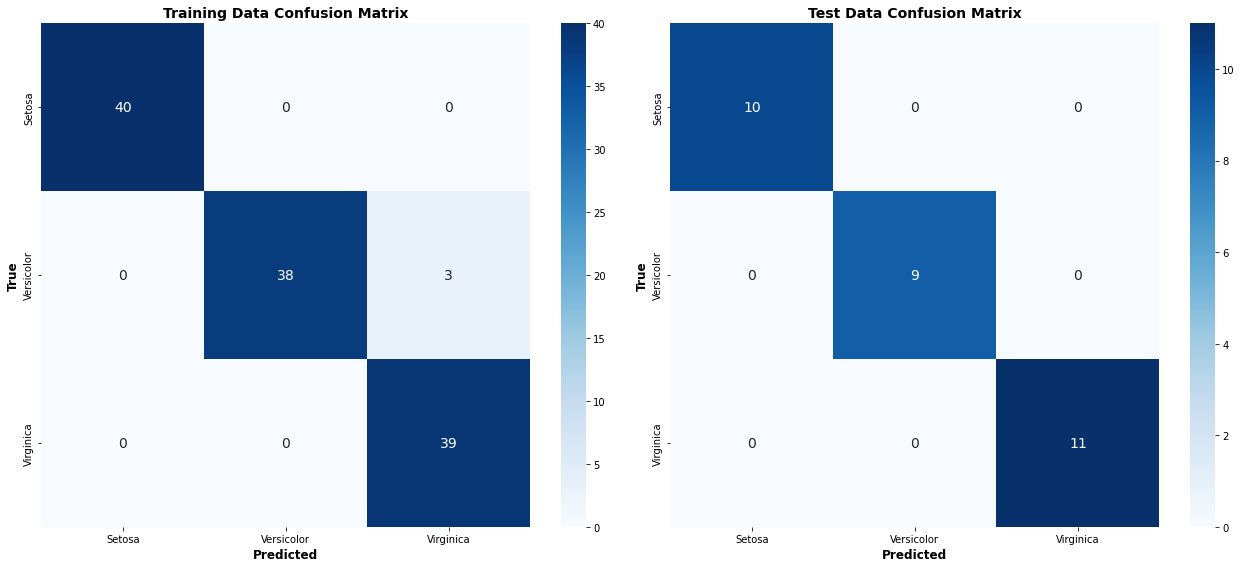

In [25]:
class_labels = ['Setosa', 'Versicolor', 'Virginica']

# Create confusion matrices for training and test data
confusion_train = confusion_matrix(y_train, y_train_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the training data confusion matrix on the first subplot
sns.heatmap(confusion_train, annot=True, annot_kws={'size': 14} ,cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title('Training Data Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True', fontsize=12, fontweight='bold')

# Plot the test data confusion matrix on the second subplot
sns.heatmap(confusion_test, annot=True, annot_kws={'size': 14}, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

<div class = "alert alert-block alert-info">
<b><u>Insights:</u></b><br>
    
* <b><i>Data Preprocessing:</i></b>
    * In the data preprocessing section, I initially encoded the output column "Species" using LabelEncoder. Subsequently, I stored the data features and label column in separate variables, X and Y. Afterward, I partitioned the dataset into an 80% training set and a 20% testing set.
    
* <b><i>Model Training:</i></b>
    * During the model training phase, I employed a Logistic Regression classifier and trained the model using the training dataset. I subsequently used the trained model to make predictions on both the training and testing datasets.

* <b><i>Model Evaluation:</i></b>
    * I calculated the accuracy score for both the training and testing datasets. The accuracy score for the training data was found to be 0.9755, while for the testing data, it was 0.1. Notably, the model exhibited misclassifications in the training dataset, specifically in the form of 3 samples that were originally 'Versicolor' (true class) but were predicted as 'Virginica' (predicted class).
</div>

<br>

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:150%; font-family:arial; text-align:center;  border-radius:20px 20px"> ML Interface: Predictions at Your Fingertips! </h3> 

In [26]:
species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Input widgets
sepal_length_widget = widgets.FloatText(description='Sepal Length:')
sepal_width_widget = widgets.FloatText(description='Sepal Width:')
petal_length_widget = widgets.FloatText(description='Petal Length:')
petal_width_widget = widgets.FloatText(description='Petal Width:')
predict_button = widgets.Button(description='Predict')

def predict_iris_species(b):
    sepal_length = sepal_length_widget.value
    sepal_width = sepal_width_widget.value
    petal_length = petal_length_widget.value
    petal_width = petal_width_widget.value
    
    input_data = pd.DataFrame({'sepal_length': [sepal_length], 'sepal_width': [sepal_width], 
                               'petal_length': [petal_length], 'petal_width': [petal_width]})
    prediction = lr.predict(input_data)
    prediction_label = species_mapping.get(prediction[0])
    result_label.value = f" Predicted Iris Species: {prediction_label}"

predict_button.on_click(predict_iris_species)

# prediction result
result_label = widgets.Label()

# widgets layout
input_widgets = widgets.VBox([sepal_length_widget, sepal_width_widget, petal_length_widget, petal_width_widget, predict_button])
output_widget = widgets.VBox([result_label])
interface = widgets.VBox([input_widgets, output_widget])

# Display the interface
display(interface)

<div class = "alert alert-block alert-info">
<b><u>Interface: Iris Species Prediction:</u></b><br>
    
Created an interactive interface with IPython widgets and a trained logistic regression model to predict Iris species using user-provided sepal and petal measurements. Users input data, start predictions with the "Predict" button, and see results in a user-friendly format.
</div>

<h3 style = "padding: 8px; background-color:#5D3FD3; color:white ; font-size:100%; font-family:Helvetica; text-align:center;  border-radius:20px 20px"> 

This project provided valuable insights into the Iris dataset through data exploration and analysis. We successfully developed an interactive interface for Iris species prediction using logistic regression. Thank you for your time and interest in this project! 😊
 </h3> 